# **IBM Educathon Taller de AI/ML**

##<b>Definición del problema</b>

**Contexto:** ¿Por que es importante resolver este problema?<br>
**Objetivos:** ¿Cual es la meta?<br>
**Preguntas claves:** ¿Cuales son las preguntas claves que necesitamos resolver?<br>
**Formulación del problema** ¿Que estamos tratando de resolver utilizando ciencia de datos?

## **Descripción de los Datos:**
El dataset de Home Equity by MIT (HMEQ) contiene información de línea de base y rendimiento de préstamos para 5,960 préstamos recientes con garantía hipotecaria. El <i>target</i> (BAD) es una variable binaria que indica si un solicitante finalmente ha incumplido o ha sido gravemente moroso. Este resultado adverso ocurrió en 1.189 casos (20 por ciento). Se registraron 12 variables de entrada para cada solicitante.


* **BAD:** 1 = Cliente incumplió con el préstamo, 0 = préstamo fue pagado

* **LOAN:** Cantidad aprobada en el préstamo.

* **MORTDUE:** Cantidad adeudada en la hipoteca existente.

* **VALUE:** Valor actual de la propiedad. 

* **REASON:** Motivo de la solicitud de préstamo. (HomeImp = mejoras para el hogar, DebtCon = consolidación de deuda, lo que significa obtener un nuevo préstamo para pagar otras obligaciones y deudas de consumo) 

* **JOB:** El tipo de trabajo que tiene el solicitante del préstamo, como gerente, autónomo, etc.

* **YOJ:** Años en el trabajo actual.

* **DEROG:** Número de informes despectivos importantes (<i> Derogatory Reports </i> que indican una morosidad grave o pagos atrasados). 

* **DELINQ:** Número de líneas de crédito morosas (una línea de crédito se vuelve morosa cuando un prestatario no realiza los pagos mínimos requeridos entre 30 y 60 días después del día en que vencían los pagos). 

* **CLAGE:** Antigüedad de la línea de crédito más antigua en meses. 

* **NINQ:** Número de consultas de crédito recientes. 

* **CLNO:** Número de líneas de crédito existentes.

* **DEBTINC:** Relación deuda-ingreso (todos los pagos mensuales de su deuda divididos por su ingreso mensual bruto. Este número es una forma en que los prestamistas miden su capacidad para administrar los pagos mensuales para pagar el dinero que planea pedir prestado).

## <b>Notas Importantes</b>

- Tanto el dataset como el notebook se tomaron como base del MIT.

- Todas las salidas en el notebook son solo para referencia y pueden ser diferentes si sigue un enfoque diferente.

- Existen secciones **Insight** que explican los resultados del código en términos que sean relevantes

- Cuando veas este texto **___________** es momento de que completes el código y proveas la respuesta

- There are sections called **Cosas que pensar** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Importar las librerías necesarias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

#algoritmos a utilizar
from sklearn.linear_model import LogisticRegression

#Metricas para evlauar el modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

#para afinar el modelo
from sklearn.model_selection import GridSearchCV

#para ignorar warnings
import warnings
warnings.filterwarnings('ignore')


### **Leer el dataset**

In [7]:
#hm=pd.read_csv("hmeq.csv")
#reading the dataset
url= 'https://raw.githubusercontent.com/juanmontalvog/ds/main/hmeq.csv'

hm=pd.read_csv(url)

In [5]:
# Copiar datos a otra variable para evitar cambios en los datos originales
data=hm.copy()

### **Imprimir los primeros y últimos 5 renglones del dataset**

In [6]:
# Desplegar los primeros 5 renglos del dataset

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Desplegar los últimos 5 renglos del dataset
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Entender la forma (<i> shape </i>) del dataset **

In [6]:
# Ver la forma del dataset

data.shape

(5960, 13)

**Insights**
- Tenemos 5960 observaciones con 13 columnas en el marco de datos

### **Comprueba los tipos de datos de las columnas**

In [7]:
# Revisa la información de los datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**
- Tenemos 2 enteros, 9 flotantes y 2 objetos como tipos de datos
- También vemos que faltan datos en las observaciones, especialmente en la columna DEBTINC, es posible que debamos hacer algunos cambios allí.

### **Revisar valores faltantes**

In [8]:
# Analizar valores faltantes

data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Verificar el porcentaje de valores faltantes en cada columna. 
# Número de valores faltantes / El número de renglones - (5960, 13)

data.isnull().sum()/data.shape[0]

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64

**Insights**

- Tenemos 21% de valores faltantes para DEBTINC
- Tenemos 11% de valores faltantes para DEROG
- BAD y LOAN no tienen valores faltantes
- El resto de las variables varían entre 1% y 9% en valores faltantes

### **Cosas que pensar:**
- Encontramos el número total de valores faltantes y el porcentaje de valores faltantes, ¿cuál es mejor considerar?
- ¿Cuál puede ser el límite para el % de valores faltantes en una columna para evitarlo y cuáles son los desafíos asociados con llenarlos y evitarlos? 

**Podemos convertir las columnas de tipo de objeto en categorías**

`convertir "objetos" a "categoría" reduce el espacio de datos requerido para almacenar el marco de datos`

### **Convertir los tipos de datos**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#agregando la variable target a esta lista ya que se trata de un problema de clasificación y la variable target es categórica
#la variable target es la que buscamos predecir

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Cambiar el tipo de dato de la columna de tipo objeto a categoría.

for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Verificando la información nuevamente y el tipo de datos de diferentes variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analizar sumario de estadísticas del conjunto de datos**

In [14]:
# Analizar sumario de estadísticas para variables numéricas

data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights**
- Tenemos montos de Préstamos desde 1100 USD hasta 89900 USD, con una media de 18607 USD.
- También tenemos un rango para el valor actual de la propiedad desde 8000 USD hasta 855909 USD. Esto está causando una gran desviación estándar, probablemente debido a la variedad de propiedades en las observaciones.
- Tenemos una antigüedad de líneas de crédito con una media de 179 meses, con un rango de 0 a 1168 meses. Probablemente haya un error con la observación máxima aquí, ya que tiene casi 100 años.
- Tenemos una media de 21 líneas de crédito por cliente con un máximo de 71.
- El importe adeudado por medio hipotecario existente es de 73.760 USD. Este valor también muestra una desviación estándar alta, probablemente debido a la variedad en las propiedades y los montos de sus préstamos.
- Tenemos un cliente con 15 líneas de crédito morosas, fuera de eso, el resto de los percentiles dan 0.
- Tenemos clientes con una media de 8 años en el trabajo, que van de 0 a 41.
- La media de la relación Deuda-Ingreso es del 33%, lo cual es una medida riesgosa. Con un máximo de 203% (algo puede estar mal aquí). 

In [15]:
# Revisar estadísticas de las variables categóricas

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights**
- Tenemos dos valores en BAD donde 0 es el valor más frecuente con el 80% de los valores
- Tenemos dos valores en RAZON donde DebtCon es el valor más frecuente con 68% de los valores
- Tenemos 6 TRABAJOS diferentes, donde el Trabajo que está categorizado como 'Otro' aparece el 42% de las veces

**Veamos los valores únicos en todas las variables categóricas**

In [16]:
# Revisar los valores únicos en cada columna categórica

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Valores únicos en ',i, 'son :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


**Insights**
- Tenemos dos valores (0, 1) en BAD donde 0 es el valor más frecuente con el 80% de los valores
- Tenemos dos valores (DebtCon, HomeImp) en REASON donde la consolidación de deuda es la razón más frecuente para un préstamo con 68% de los valores
- Tenemos 6 profesiones diferentes (ProfExe, Office, Mgr, Self, Sales y Other), donde JOB que está categorizado como 'Other' aparece el 42% de las veces. Probablemente queramos agregar más detalles a este campo ya que 'Otro' no dice mucho, especialmente con la cantidad de observaciones que tenemos para ese valor.

## **Exploratory Data Analysis (EDA) y Visualización**

## **Análisis Univariante**

El análisis univariante se utiliza para explorar cada variable en un conjunto de datos, por separado. Mira el rango de valores, así como la tendencia central de los valores. Se puede hacer tanto para variables numéricas como categóricas.

### **1. Análisis Univariante - Datos Numéricos**
Histogramas y box plots ayudan a visualizar y describir datos numéricos. Usamos estas gráficas para analizar las columnas numéricas.

In [17]:
# Al hacer un análisis univariante de variables numéricas, queremos estudiar su tendencia central y dispersión.
# Vamos a escribir una función que nos ayude a crear box plots e histogramas para cualquier variable numérica de entrada.
# Esta función toma la columna numérica como entrada y devuelve los diagramas de caja y los histogramas para la variable.
# El uso de estas funciones nos ayuda a escribir código más rápido y limpio.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot e histogram combinadas
    feature: 1-d feature array
    figsize: tamaño de la figura (default (9,8))
    bins: number de bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Numero de renglones del sub-plot grid= 2
                                           sharex = True, # x-axis será compartida entre los subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creando los 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # se creara el boxplot y con una estrella se indicará la media
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') #Agregar la media al histograma
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Agregar la mediana al histograma

#### Usando la función anterior, analicemos primero el histograma y el box plot para LOAN

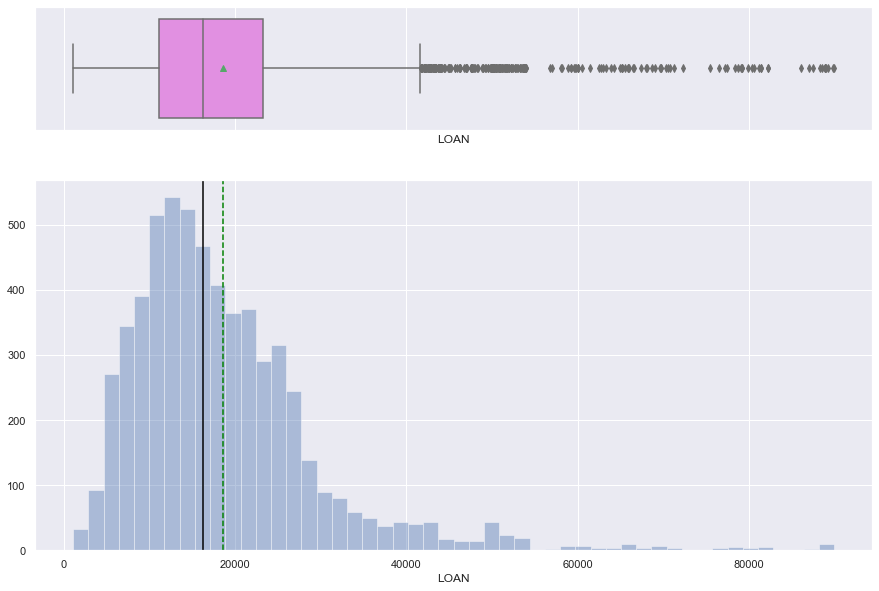

In [18]:
# Construir las gráficas para LOAN
histogram_boxplot(data['LOAN'])

**Insights**
- Vemos muchos valores atípicos (<i>outliers</i>) en este análisis de LOAN. Esta es una distribución sesgada a la derecha. Aunque la mayoría de las observaciones están por debajo de la media de 18607.

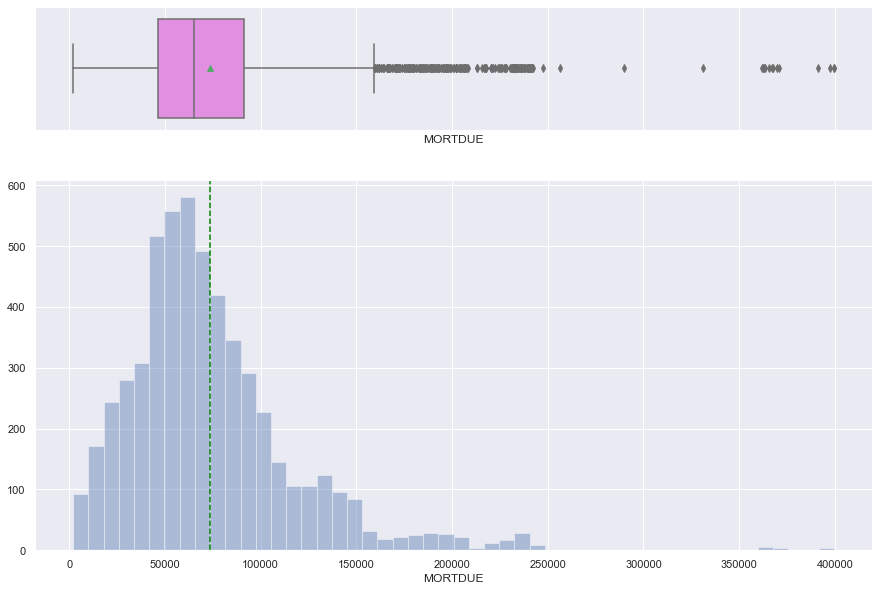

In [19]:
# Construir las gráficas para MORTDUE
histogram_boxplot(data['MORTDUE'])

**Insights**
- La distribución de MORTDUE es muy similar a la de LOAN. Está sesgado a la derecha con muchos valores atípicos.
- Además, la mayoría de los clientes debe menos de la media de 73,760 USD.
- Deberíamos tratar los valores atípicos para obtener una distribución normal

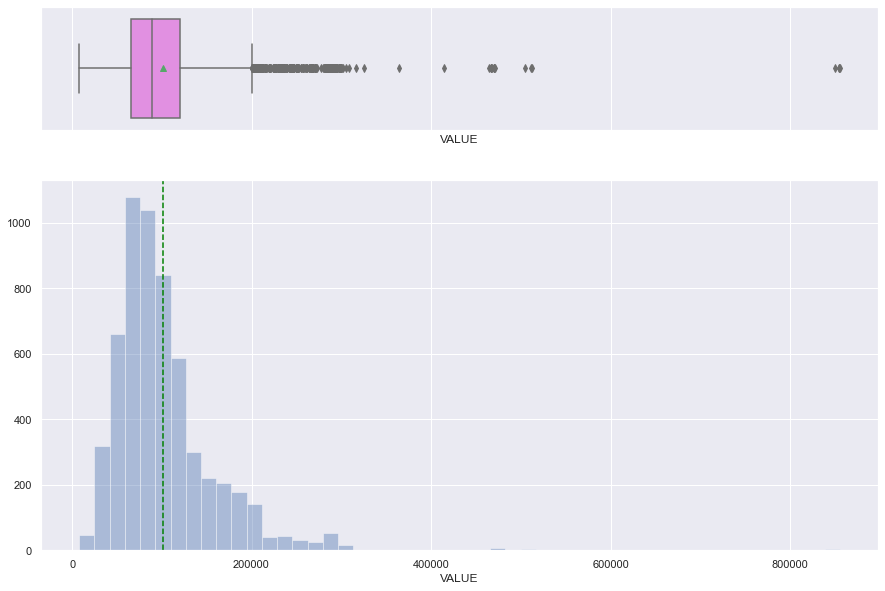

In [20]:
# Construir las gráficas para VALUE
# Escribe aqui tu código
___________________________

**Insights**
- La distribución del VALUE es muy similar a LOAN y MORTDUE. Está sesgado a la derecha con muchos valores atípicos.
- La mayoría de las propiedades valen menos que la media de 101K USD

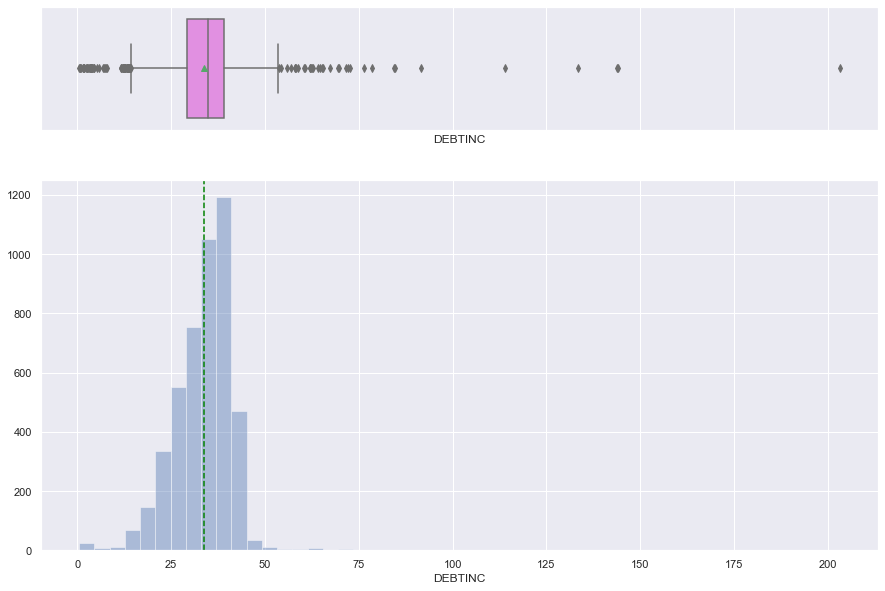

In [24]:
# Construir las gráficas para DEBTINC
# Escribe aqui tu código
___________________________

**Insights**
- A diferencia de otros valores, la relación DEBTINC tiene valores atípicos a izquierda y derecha. También la mayoría de las observaciones tienen una relación DEBTINC superior a la media del 33%.
- Deberíamos tratar los valores atípicos para obtener una distribución normal.

### **2. Análisis Univariante - Datos Categóricos**

In [25]:
# Función para crear diagramas de barras que indican porcentajes para cada categoría.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    '''

    total = len(feature) # longitud de la columna
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # porcentaje de cada categoria
        x = p.get_x() + p.get_width() / 2 - 0.05 # ancho del plot
        y = p.get_y() + p.get_height()           # alto del plot
        ax.annotate(percentage, (x, y), size = 12) # porcentaje 
        
    plt.show() # muestra el plot

#### Analyze Barplot for DELINQ

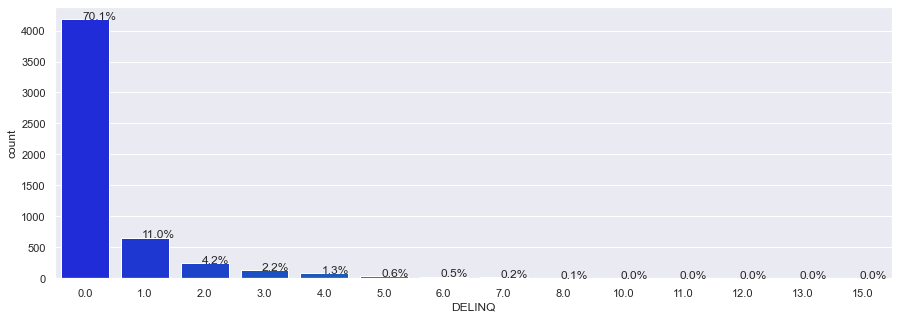

In [26]:
#Construir la gráfica de barras de DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**
- _______________

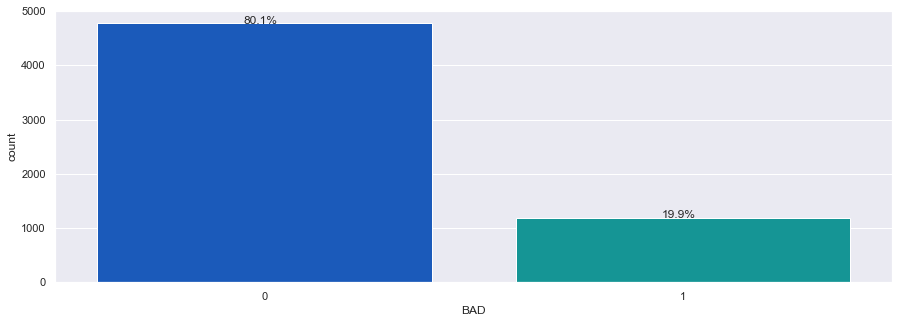

In [27]:
#Construir la gráfica de barras de BAD

plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

**Insights**
- El 80% de las observaciones el cliente nunca incumplió el préstamo.
- 20% de las observaciones el cliente falló en el pago

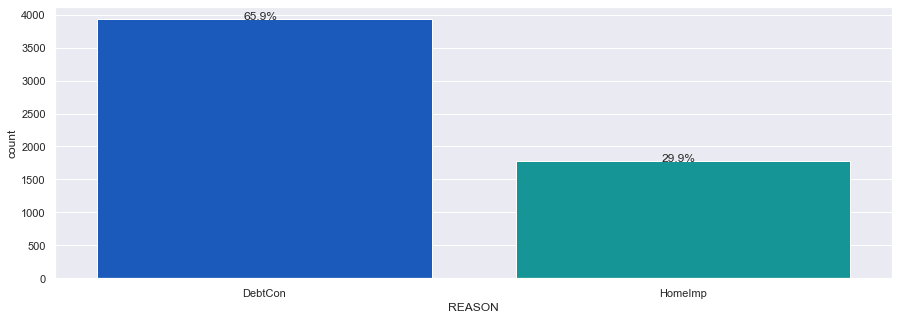

In [28]:
#Construir la gráfica de barras de REASON

plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

**Insights**
- _____________

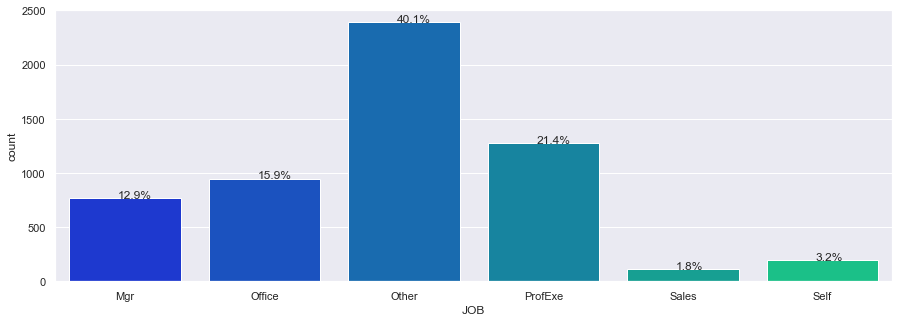

In [29]:
#Construir la gráfica de barras de JOB

plt.figure(figsize=(15,5))
ax = sns.countplot(_________,palette='winter')
perc_on_bar(ax,________)

**Insights**
- El 40% de los préstamos fueron contratados para clientes con Job='Other'. Esto no da mucha información.
- El 21% de los Préstamos fueron contratados por ProfExe. Esta es la primera profesión en términos de préstamos contratados
- Oficina tiene 15,9% y Gerente 12,9%.
- No muchos trabajadores por cuenta propia tienen préstamos, sólo el 3,2%. Además, no muchos vendedores tienen préstamos, solo el 1,8%. Debemos hacer doble clic aquí para ver lo que está sucediendo.

## **Análisis bivariado**

#### Analizar BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

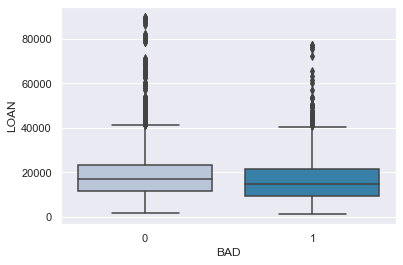

In [32]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**
- La mayoría de los préstamos en mora son mayores a 40,000 USD
- La media de los préstamos morosos es ligeramente inferior a los préstamos cumplidos.

#### Analizar REASON vs LOAN

<AxesSubplot:xlabel='REASON', ylabel='LOAN'>

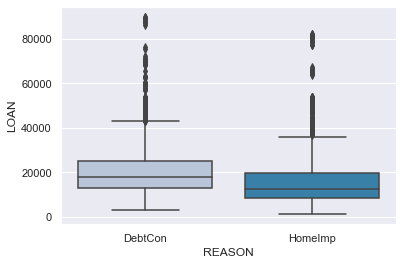

In [33]:
sns.boxplot(data["REASON"],data['LOAN'],palette="PuBu")

**Insights**
- Debt consolidation loans are approved for larger amounts than Home Improvements
- The mean of the debt consolidations loans is greater than the loans for home improvements.

#### Analizar JOB vs LOAN

<AxesSubplot:xlabel='JOB', ylabel='LOAN'>

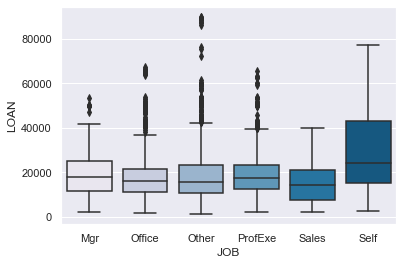

In [34]:
sns.boxplot(______,______,palette="PuBu")

**Insights**
- La media de la cantidad de los préstamos aprobada para Self es la mayor entre las profesiones.
- La profesión 'Otra' recbe la mayor cantidad aprobada de préstamo.

#### Analizar BAD vs DEBTINC

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

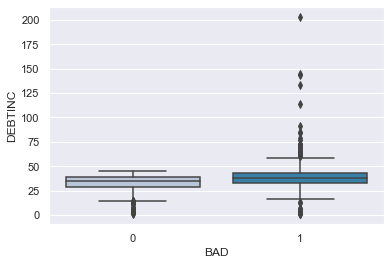

In [35]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

**Insights**
- La mayoría de los préstamos en mora se producen cuando la relación deuda-ingresos es superior a 55%

<AxesSubplot:xlabel='JOB', ylabel='DEBTINC'>

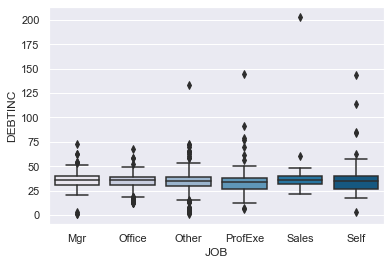

In [36]:
sns.boxplot(data["JOB"],data['DEBTINC'],palette="PuBu")

**Insights**
- El ProfExe y el Self job tienen las peores relaciones deuda-ingreso.

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

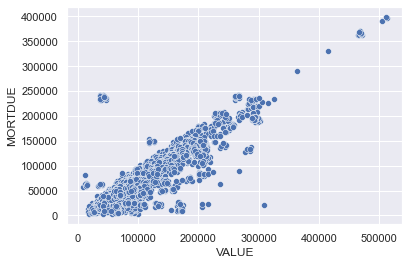

In [39]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights**
- Cuanto mayor sea el valor actual de la propiedad, mayor será el monto adeudado en la hipoteca existente
- Hay una tendencia para estas dos variables

<AxesSubplot:xlabel='VALUE', ylabel='LOAN'>

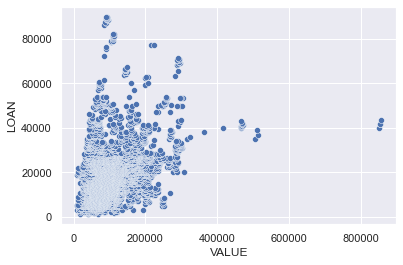

In [40]:
sns.scatterplot(data["VALUE"],data['LOAN'],palette="PuBu")

**Insights**
- Hay algunos préstamos realmente grandes para propiedades que no son tan valiosas.
- No hay tendencia para estas dos variables aparentemente

### **Bivariate Analysis:  BAD vs Categorical Variables**

**El chart de stacked bar (también conocido como gráfico de barras apiladas)** amplía el gráfico de barras estándar de observar valores numéricos en una variable categórica a dos.

In [45]:
### Función para trazar gráficos de barras apiladas para columnas categóricas, la variable BAD es fija

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


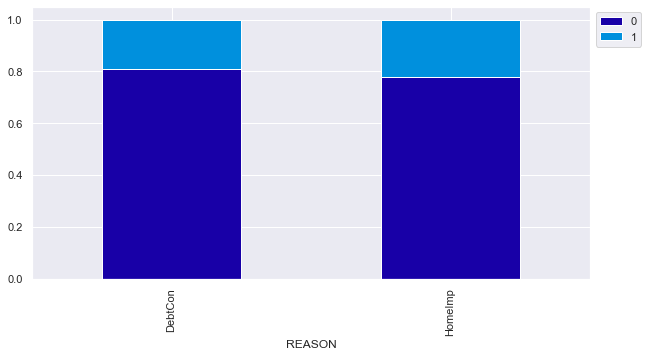

In [46]:
# Stacked bar para BAD & REASON
stacked_plot(data['REASON'])

**Insights**
- El 19% de los préstamos para consolidación de deuda están en mora
- El 22% de los préstamos para mejoramiento de vivienda están en mora

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


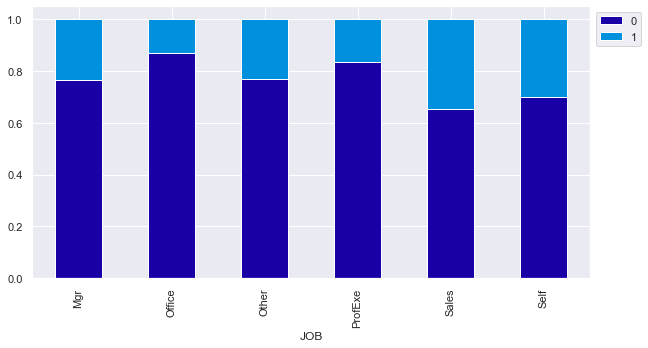

In [47]:
# Stacked bar para BAD & REASON
stacked_plot(__________)

**Insights**
- El 23% de los préstamos para Managers están en mora
- El 13% de los préstamos para empleados de oficina están en mora
- El 23% de los préstamos para 'Otra' profesión están en mora
- El 16% de los préstamos aprobados para los clientes de ProfExe están en mora. Esta es la profesión nombrada con más préstamos aprobados.
- El 34% de los préstamos aprobados para clientes de Ventas están en mora
- El 30% de los préstamos aprobados para autónomos están en mora.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

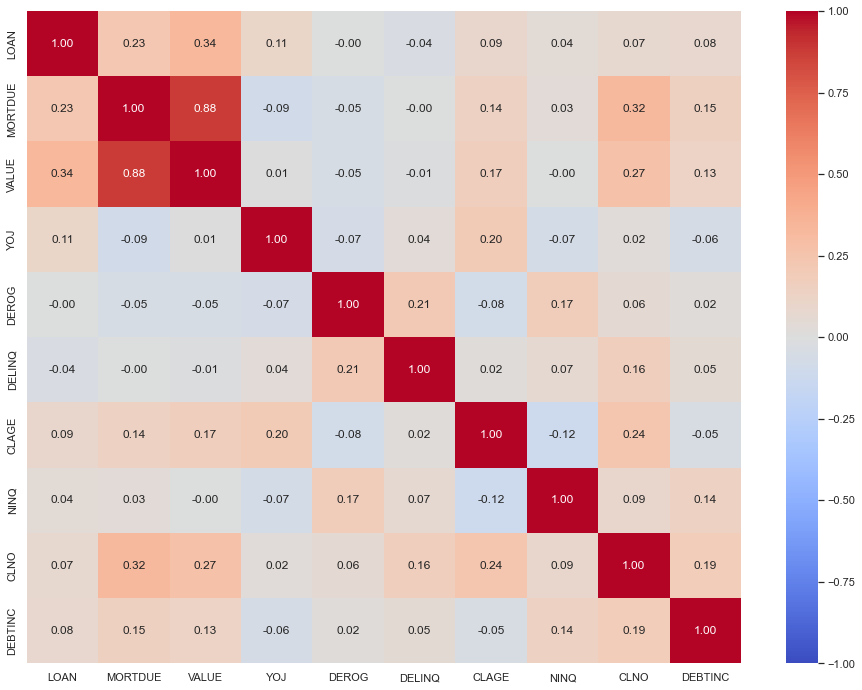

In [50]:
# Separamos las variables numércias
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Construir matriz de correlación para variables numéricas

corr = data[numerical_col].corr()

# dibujamos el heatmap

plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

#### Treating Outliers

In [52]:
def treat_outliers(df,col):
    '''
    manejar los valores atípicos de la función
    col: str, nombre de la variable numérica
    df: data frame
    col: nombre de la columna
    '''
    
    Q1=df.quantile(q=0.25) # 25th quantile
    Q3=df.quantile(q=0.75)  # 75th quantile
    IQR=Q3 - Q1   # IQR Range
    Lower_Whisker = (Q1 - 1.5*IQR)[col]  #define lower whisker
    Upper_Whisker = (Q3 + 1.5*IQR)[col]  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # a todos los valores más pequeños que Lower Whisker se les asignará el valor de Lower Whisker 
                                                            # a todos los valores mayores que Upper Whisker se les asignará el valor de Upper Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    manejar los valores atípicos de la función en todo el data frame
    col_list: lista de variables numéricas
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [53]:
#hacemos una nueva copia de los datos para trabajar los valores atípicos
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# obtenemos la lista de columnas numéricas

df = treat_outliers_all(df_raw,numerical_col) # invocamos a la función para gestionar los valores atípicos

#### Ahora trataremos los renglones con vacíos en sus datos 

In [54]:
#Para cada columna, creamos una bandera binaria para la fila, si falta un valor en la fila, entonces 1, de lo contrario, 0. 
def add_binary_flag(df,col):
    '''
    df: dataframe
    col: columna a la que le faltan valores
    regresa un dataframe con valores binarios si falta información
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [55]:
# lista de columnas que tiene valores faltantes en ella
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Rellenar valores faltantes en columnas numéricas con mediana y moda en variables categóricas

In [56]:
#  Tratar valores faltantes en columnas numéricas con mediana y moda en variables categóricas
# Seleccionar columnas numéricas.
num_data = data.select_dtypes('number')

# Seleccione columnas de tipo categoría.
cat_data = data.select_dtypes('category').columns.tolist()

# Llena columnas numéricas con la mediana.
data[num_data.columns] = num_data.fillna(num_data.median())

# Llena columnas categóricas con moda
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Vamos a validar que ya no tenemos valores faltantes en nuestros datos

In [57]:
______________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


# **Construcción de Modelos de Machine Learning*

## **Enfoque**
1. Preparación de datos
2. Dividir los datos en <i>train</i> y <i>test</i>
3. Ajuste en los datos <i>train</i>
4. Ajuste el modelo, si es necesario.
5. Pruebe el modelo en el conjunto de datos <i>test</i>

## **Preparación de datos**

### **Separación de la variable objetivo de otras variables**

In [58]:
# Borrar la variable dependiente del dataframe y cree la matriz X (variable independiente)
# La variable dependiente es la variable que queremos predecir
X=data.drop(['BAD'],axis=1)

# Crear variables ficticias (dummy) para las variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Crear y(Variable dependiente)

y = data.BAD

### **Dividir los datos en 70 % <i>train</i> y 30 % <i>test</i> **

In [59]:
# Dividir los datos en 70 % train y 30 % test

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=1)

### **Think about it** 
- Puedes probar diferentes splits como 70:30, 67:33 u 80:20 para tu elección.

## **Criterio de evaluación del modelo**

#### Después de comprender la declaración del problema, piense qué métricas de evaluación considerar y por qué

<img src='https://1.cms.s81c.com/sites/default/files/2021-03-03/model-over-fitting.png'></img>

In [60]:
#creamos la función de métricas
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Construir un modelo de regresión logística** 

In [61]:
# Definimos el modelo de regresión logística
log_reg= LogisticRegression(random_state=1)


# Fitting the model on the training data 

log_reg.fit(X_train,y_train)

LogisticRegression(random_state=1)

#### Validamos el performance el dataset train

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.72      0.03      0.06       817

    accuracy                           0.81      4172
   macro avg       0.77      0.51      0.48      4172
weighted avg       0.79      0.81      0.73      4172



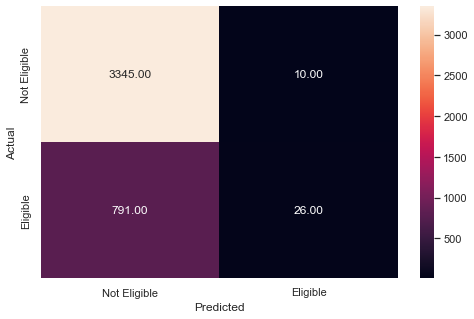

In [62]:
#Predicción para el conjunto train
optimal_threshold1=.5
y_pred_train = log_reg.predict_proba(X_train)

#Validamos el perfomance del conjunto de datos train
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

**Reading confusion matrix (clockwise):**

<img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png'></img>

- **Verdadero positivo**: Predecir que el préstamo incumplirá y el préstamo incumplirá
- **Falso Negativo**: Predecir que el préstamo no incumplirá pero el préstamo incumple
- **Verdadero negativo**: Predecir que el préstamo no incumplirá y el préstamo no incumplirá
- **Falso positivo**: Predecir que el préstamo incumplirá pero el préstamo no incumple

**Observations**

- **Estamos obteniendo una precisión (accuracy) de alrededor del 81 %** en el conjunto de datos train.
- El recall para este modelo es del 100 % para la clase 0, pero solo del 3 % para la clase 1, que tendrá un desempeño deficiente en la predicción de préstamos en los que el cliente incumplirá
- El recall promedio de 0,515 sugiere que existe una probabilidad del 48,5 % (1 - 0,515) de que el modelo prediga que un préstamo va a incumplir incluso cuando no lo haría, y la empresa perdería su tiempo y energía en estos préstamos que no corren el riesgo de ser incumplidos.
- La precisión es baja para la clase 1

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.50      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.65      0.50      0.45      1788
weighted avg       0.73      0.79      0.70      1788



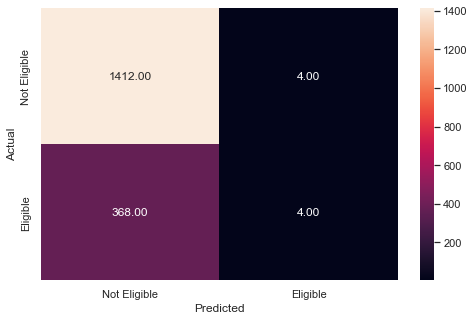

In [63]:
#Predict for test set

y_pred_test = log_reg.predict_proba(X_test)

#checking the performance on the test dataset


metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations**

- **Estamos obteniendo una precisión de alrededor del 79 %** en el conjunto de datos de prueba.
- El recall para este modelo es del 100 % para la clase 0, pero solo del 1 % para la clase 1, que tendrá un desempeño deficiente en la predicción de préstamos en los que el cliente incumplirá
- El recall promedio de 0,505 sugiere que existe una probabilidad del 49,5% (1 - 0,505) de que el modelo prediga que un préstamo va a incumplir incluso cuando no lo haría, y la empresa perdería su tiempo y energía en estos préstamos. que no corren el riesgo de ser incumplidos.
- La precisión es realmente baja para la clase 1 como 0.5.

### **Think about it:**
- El modelo de regresión logística anterior fue construído con un threshold de 0.5, podemos utilizar algún otro?
- Podemos mejorar el modelo afinando este threshold??

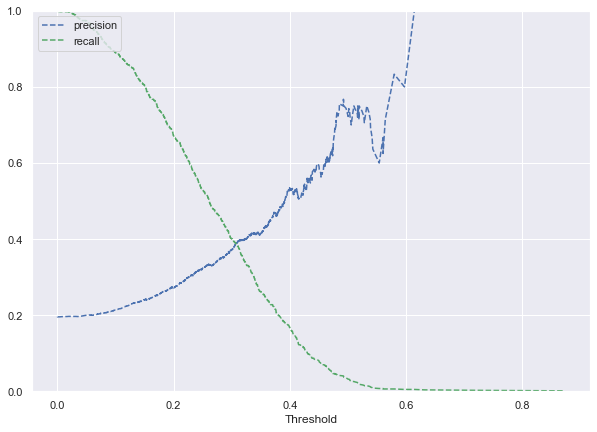

In [65]:
from sklearn.metrics import precision_recall_curve

y_scores=log_reg.predict_proba(X_train) #predict_proba da la probabilidad de que cada observación pertenezca a cada clase

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Dibuja los valores de precisions, recalls, y thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observaciones:**
- Podemos ver que **la precisión y la recuperación están equilibradas para el umbral de alrededor de 0,3.**
- Tratemos de calcular el umbral exacto donde la precisión y la recuperación son iguales.

In [66]:
#calculando el umbral exacto donde la precisión y la recuperación son iguales.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.307297158791168


- El umbral de 0,3 daría una precisión y recuperación equilibradas.
- Veamos cómo se ve eso en el modelo y ver los datos escalados también afecta

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3355
           1       0.39      0.39      0.39       817

    accuracy                           0.76      4172
   macro avg       0.62      0.62      0.62      4172
weighted avg       0.76      0.76      0.76      4172



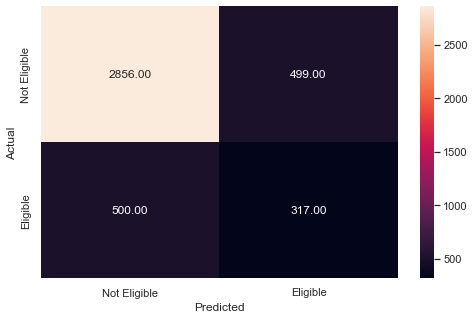

In [67]:
#Predict for train set
optimal_threshold1=.30729715879717345
y_pred_train = log_reg.predict_proba(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

**Observations**

- **Obtenemos una precisión más baja de alrededor del 76 %** en el conjunto de datos train, pero los datos en la clase 1 son mucho mejores
- Veamos cómo lo hace con datos de prueba.

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1416
           1       0.37      0.34      0.36       372

    accuracy                           0.74      1788
   macro avg       0.60      0.59      0.60      1788
weighted avg       0.73      0.74      0.74      1788



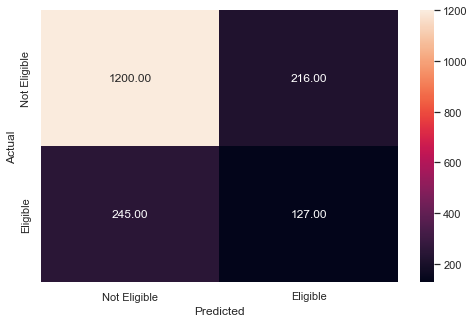

In [68]:
#Predict for test set

y_pred_test = log_reg.predict_proba(X_test)

#checking the performance on the test dataset


metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

- Mostró una mejora en el recuerdo de clase 1, pero no en general.

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [69]:
# Borrar la variable dependiente del dataframe y cree la matriz X (variable independiente)
# La variable dependiente es la variable que queremos predecir
X=data.drop(['BAD'],axis=1)

# Crear variables ficticias (dummy) para las variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Crear y(Variable dependiente)

y = data.BAD

#### Split the data

In [70]:
# Split the data into training and test set

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=1)

In [71]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

dt = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [72]:
#fitting Decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



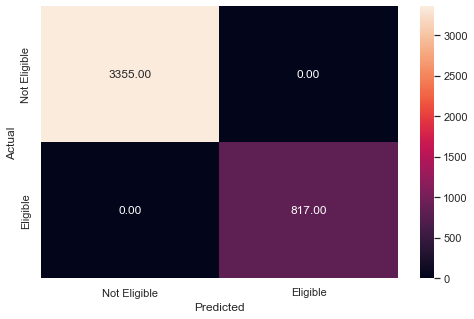

In [73]:
# Checking performance on the training data

y_train_pred_dt=dt.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.70      0.62      0.66       372

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



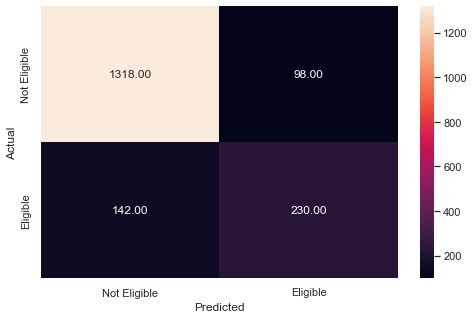

In [74]:
# Checking performance on the testing data

y_test_pred_dt=dt.predict(X_test)
metrics_score(y_test,y_test_pred_dt)

**Insights**
- El árbol de decisión está dando un **resultado del 100 % en el conjunto de datos de entrenamiento.**
- El árbol de decisiones funciona bien con los datos de entrenamiento, pero **no tan bien con los datos de prueba**, ya que la recuperación es 0,62 en comparación con 1 para el conjunto de datos de entrenamiento. es decir, el árbol de decisiones se ajusta demasiado a los datos de entrenamiento.
- La precisión de los datos de prueba sugiere que hay un 30 % (1-0,70) de posibilidades de que el modelo prediga que un préstamo incumplirá aunque no lo hará, y **la empresa puede perder su tiempo y energía en estos préstamos que no corren el riesgo de incumplir.**
- El árbol de decisión general funciona mucho mejor que la regresión logística

### **Think about it:**
- ¿Podemos mejorar este modelo?
- ¿Cómo obtener parámetros óptimos para obtener los mejores resultados posibles?

Me gustaría revisar la importancia de los features para este modelo

<AxesSubplot:xlabel='Importance'>

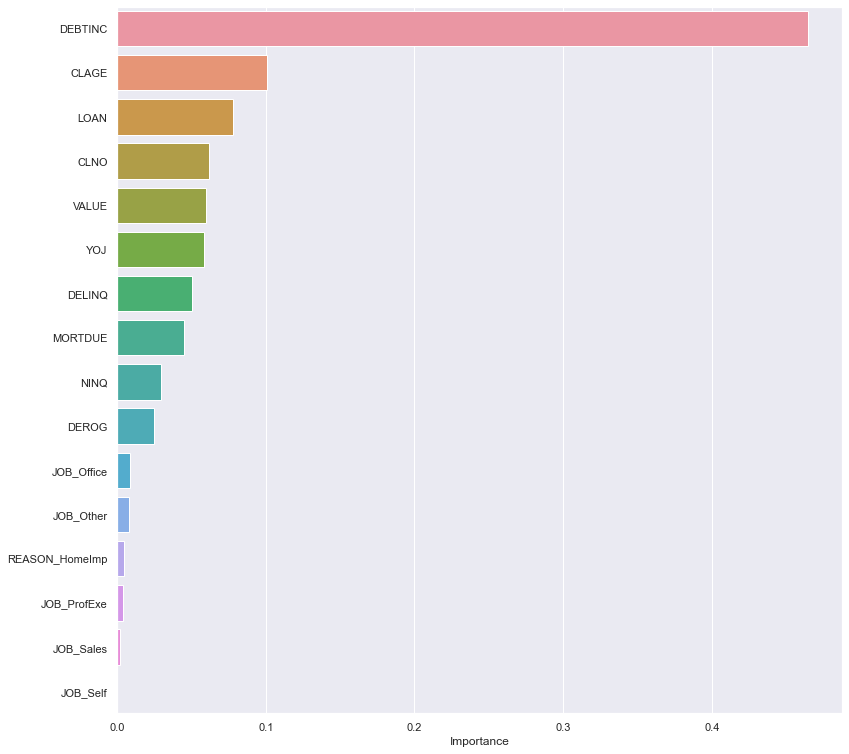

In [75]:
#plot the feature importance
importances = dt.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

- Esta es una similitud entre los modelos, DEBTINC y CLAGE son las características más importantes para el modelo

# **Fin del taller Hands-on Educathon**

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [76]:
# Choose the type of classifier. 
# Remove _________ and complete the code
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.2,1:0.8}, random_state=1)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2,7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label=1)


# Run the grid search
# Remove _________ and complete the code
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)


# Fit the GridSearch on train dataset
# Remove _________ and complete the code
gridCV = gridCV.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
dtree_estimator = gridCV.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=25, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      3355
           1       0.56      0.84      0.67       817

    accuracy                           0.84      4172
   macro avg       0.76      0.84      0.78      4172
weighted avg       0.88      0.84      0.85      4172



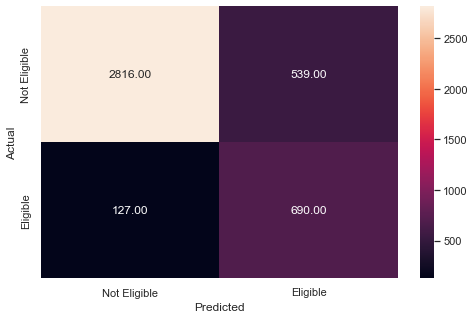

In [77]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_train_pred_dt=dtree_estimator.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1416
           1       0.54      0.78      0.64       372

    accuracy                           0.82      1788
   macro avg       0.74      0.80      0.76      1788
weighted avg       0.85      0.82      0.83      1788



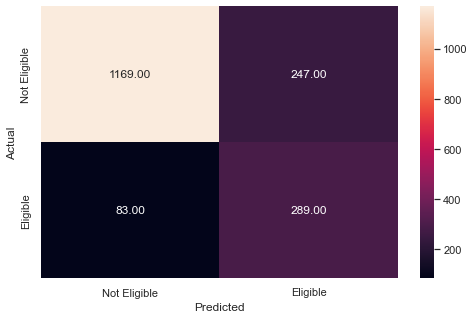

In [78]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code
y_test_pred_dt=dtree_estimator.predict(X_test)
metrics_score(y_test,y_test_pred_dt)


**Insights**
- As compared to the base model, **the performance on the tuned model for the training set has gone down significantly.**
- The tuned model is not performing as well as the previous/base model.
- This model is not over-fitting on the training data, and giving approx. the same result on the test and train datasets.
- Precision for the test data has gone down significantly from .70 to .54 as compared to the previous model. which means the tuned model will give a high number of false positives i.e. this model will predict the loan is going to be defaulted even if it won't, and this will cost time and effort to the company.

#### Plotting the Decision Tree

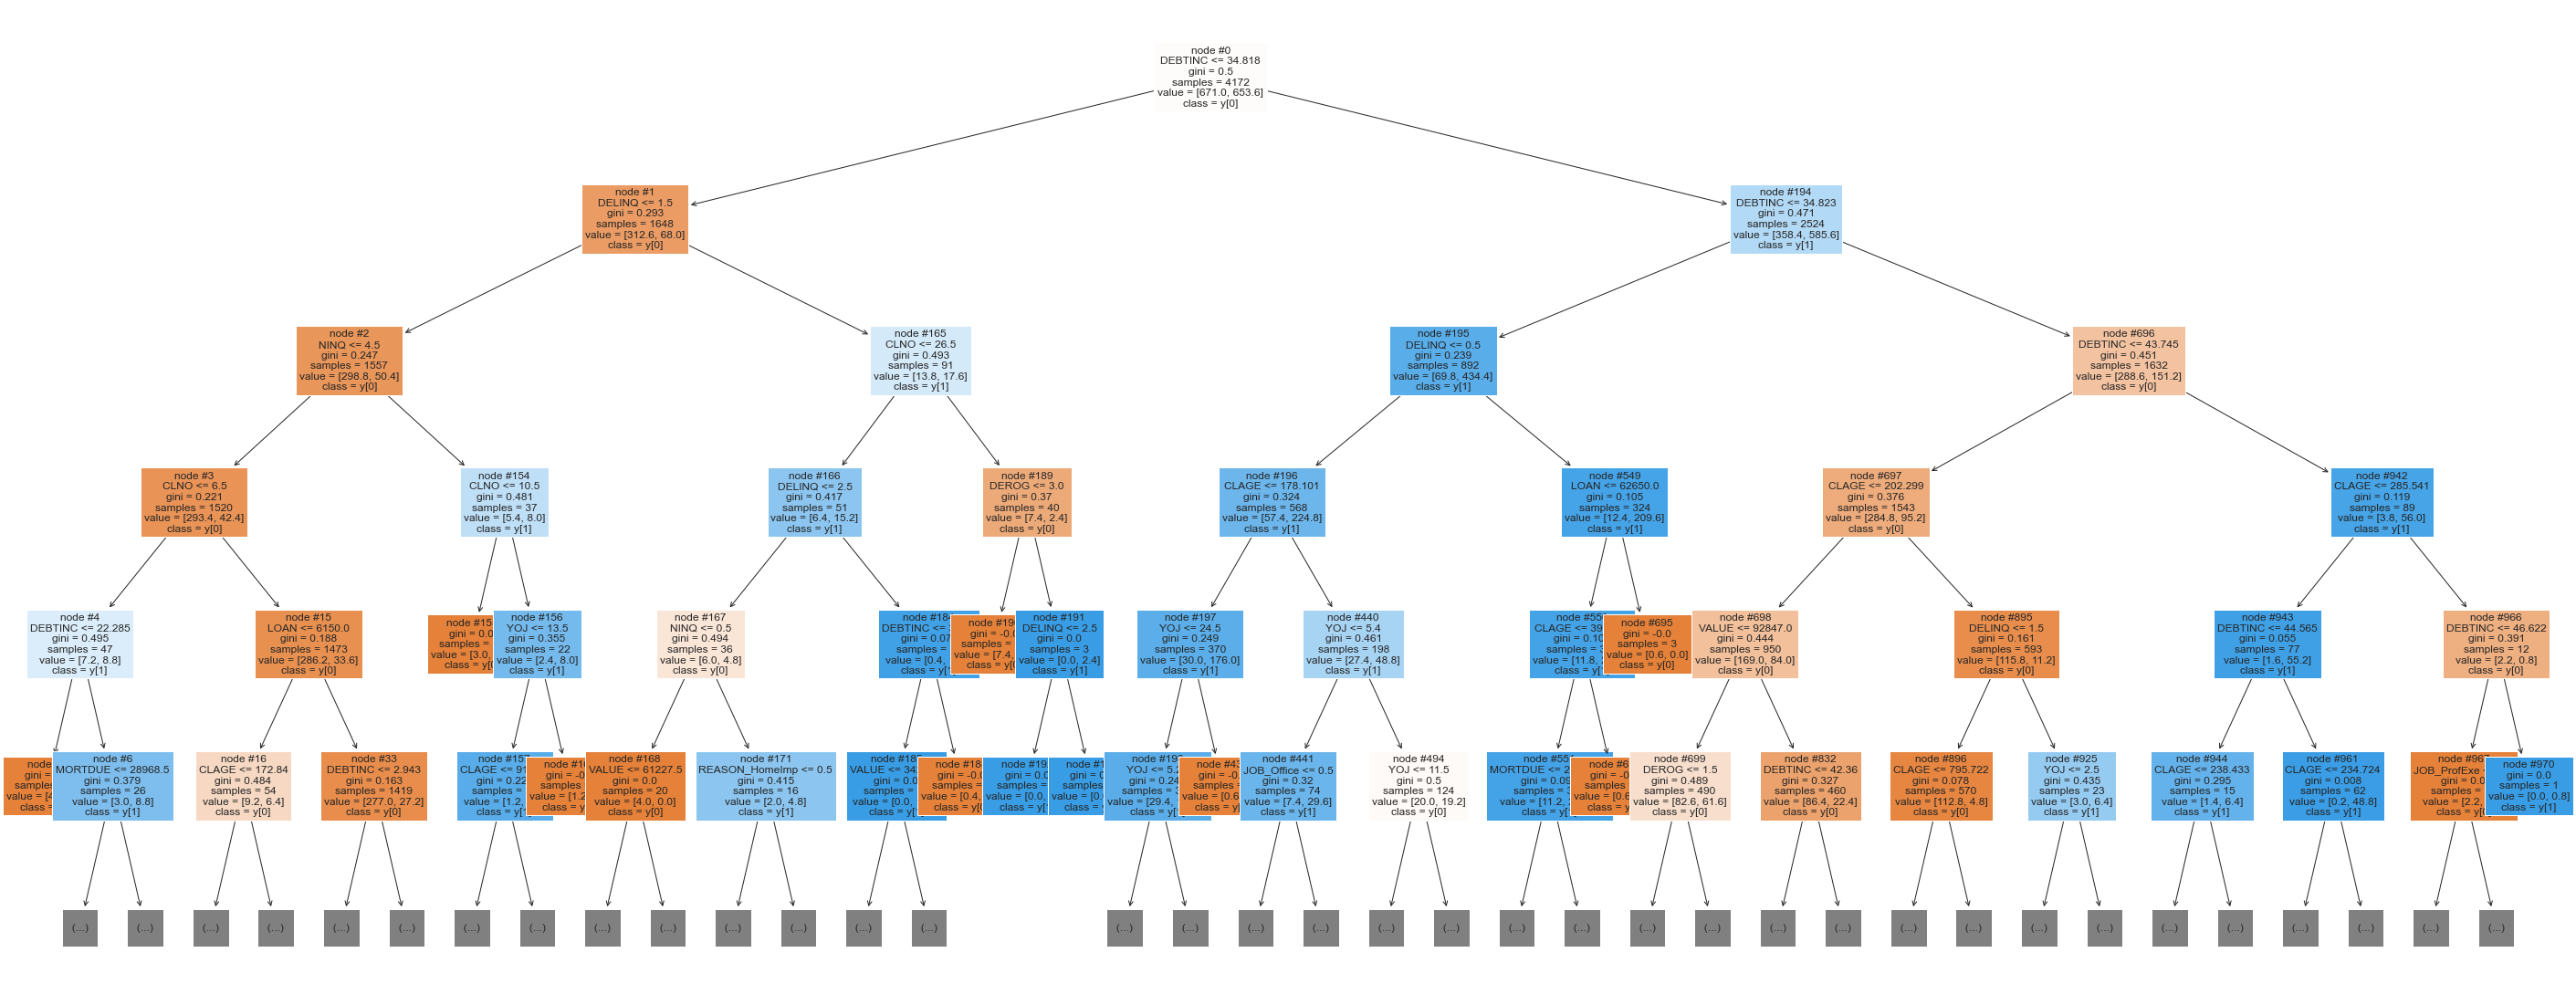

In [79]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code

features = list(X.columns)

plt.figure(figsize=(50,20))

tree.plot_tree(dt,max_depth=5,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down

- When the debt to income ratio is greater than 34.818% it is a risky loan and it's more probable that it will default
- Those loans where the debt to income ratio is greater than 34% and have more than 1 delinquent credit lines the loan is in risk of being defaulted
- When the customer has less years on the job are more prone to default loans
- For loans where the debt to income ratio is greater than 46% and the credit line age is greater than 285 months it will default
- Even if the customer has a good debt to income ratio lower than 34% and has one or less deliqnuent credit lines, the loan may default if the Number of recent credit inquiries is greater than 4
- Loans with more than 3 major derogatory reports will default

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [80]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



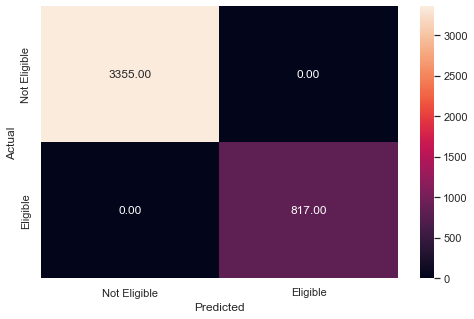

In [81]:
#Checking performance on the training data
# Remove _________ and complete the code
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.69      0.79       372

    accuracy                           0.92      1788
   macro avg       0.92      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



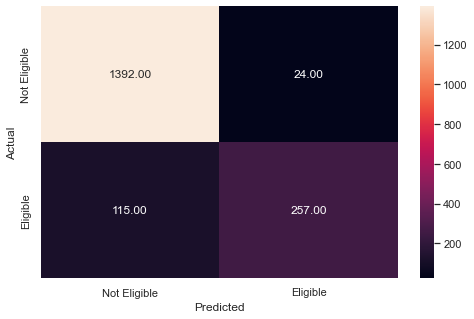

In [82]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

**Observations**

- The Random Forest Classifier is giving a **100% result on the training dataset.** Accuracy on testing data set is 0.92, the best among models so far.
- The Random Forest Classifier works well on the training data but **not so well on the test data** as the recall is 0.69 as compared to 1 for the training dataset. i.e. the Decision Tree is over-fitting on the data.
- The precision on the test data suggests that there's a 9% (1-0.91) chance that the model will predict that a loan is going to default though it would not, this is so much better than Decision Tree and Logistic Regression
- Overall Random Forest Classifier is working way much better than Decision Tree and Logistic Regression

I wanna see the importance on variables

<AxesSubplot:xlabel='Importance'>

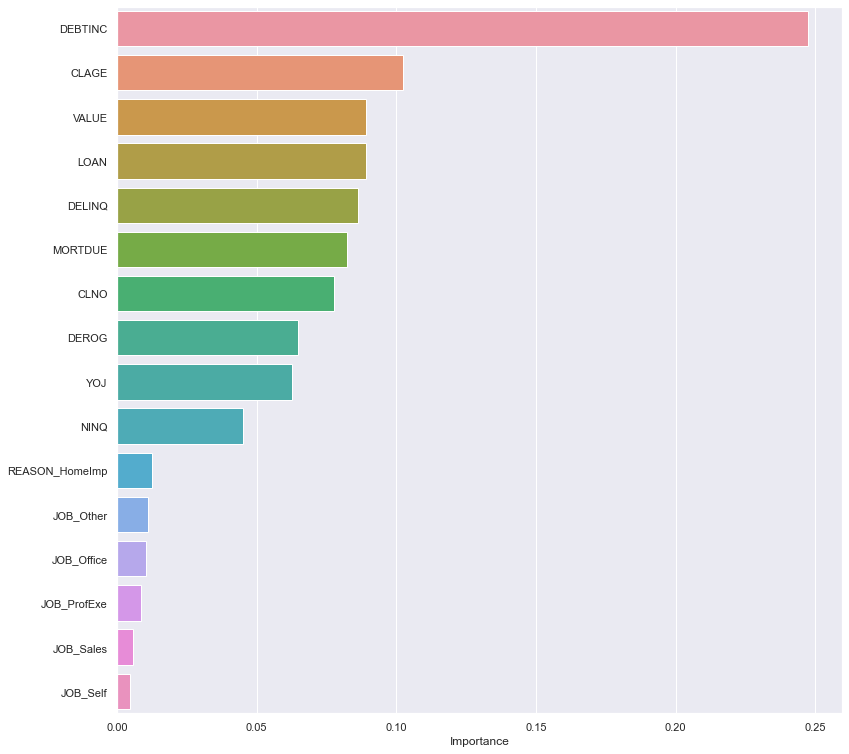

In [83]:
importances = rf_estimator.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

- Not by that far, but again DEBTINC and CLAGE are the most important features

### **Build a Random Forest model with Class Weights**

In [84]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code
rf_estimator_weight = RandomForestClassifier(class_weight={0:0.2,1:0.8}, random_state=1)


# Fitting Random Forest model
# Remove _________ and complete the code

rf_estimator_weight.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



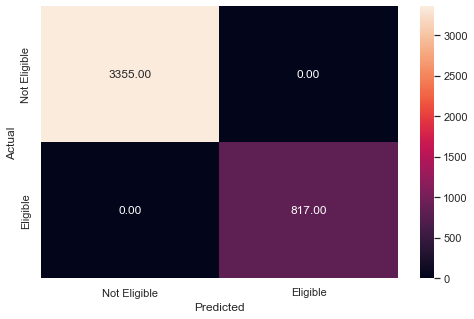

In [85]:
# Checking performance on the train data
# Remove _________ and complete the code

y_pred_train_rf = rf_estimator_weight.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.66      0.76       372

    accuracy                           0.91      1788
   macro avg       0.91      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



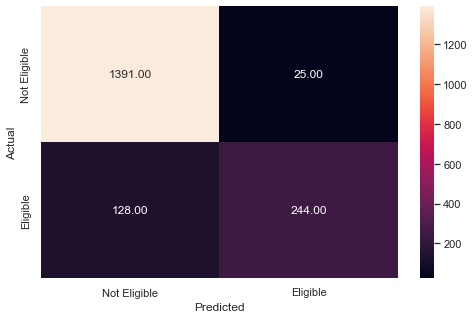

In [86]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test_rf = rf_estimator_weight.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [87]:
# Choose the type of classifier. 
# Remove _________ and complete the code
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.2,1:0.8}, random_state=1)


# Grid of parameters to choose from
# Remove _________ and complete the code
params_rf = {  
        "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'auto'],
}


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label=1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=3,
                       n_estimators=250, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3355
           1       0.92      0.99      0.95       817

    accuracy                           0.98      4172
   macro avg       0.96      0.98      0.97      4172
weighted avg       0.98      0.98      0.98      4172



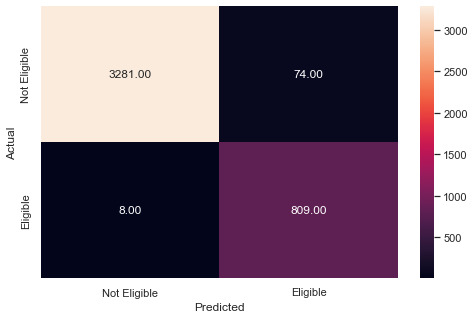

In [88]:
# Checking performance on the training data
# Remove _________ and complete the code
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1416
           1       0.83      0.75      0.79       372

    accuracy                           0.92      1788
   macro avg       0.88      0.86      0.87      1788
weighted avg       0.91      0.92      0.92      1788



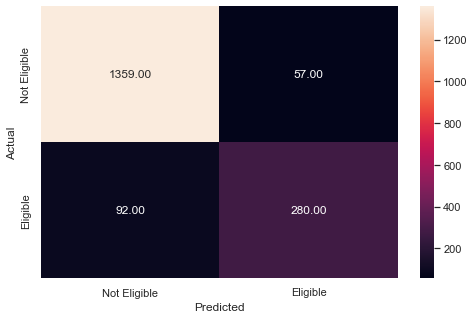

In [89]:
# Checking performace on test dataset
# Remove _________ and complete the code

y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

**Insights**

- The Tuned Random Forest Classifier is giving a **98% result on the training dataset.** Accuracy on testing data set is 0.92, the same as Random Forest Classifier with Class Weights.
- The Tuned Random Forest Classifier works well on the training data but **not so well on the test data** as the recall is 0.75 as compared to 0.99 for the training dataset. i.e. the Decision Tree is over-fitting on the data. However, this is the best result for all models
- The precision on the test data suggests that there's a 17% (1-0.83) chance that the model will predict that a loan is going to default though it would not, this is so much better than Decision Tree and Logistic Regression

#### Plot the Feature importance of the tuned Random Forest

<AxesSubplot:xlabel='Importance'>

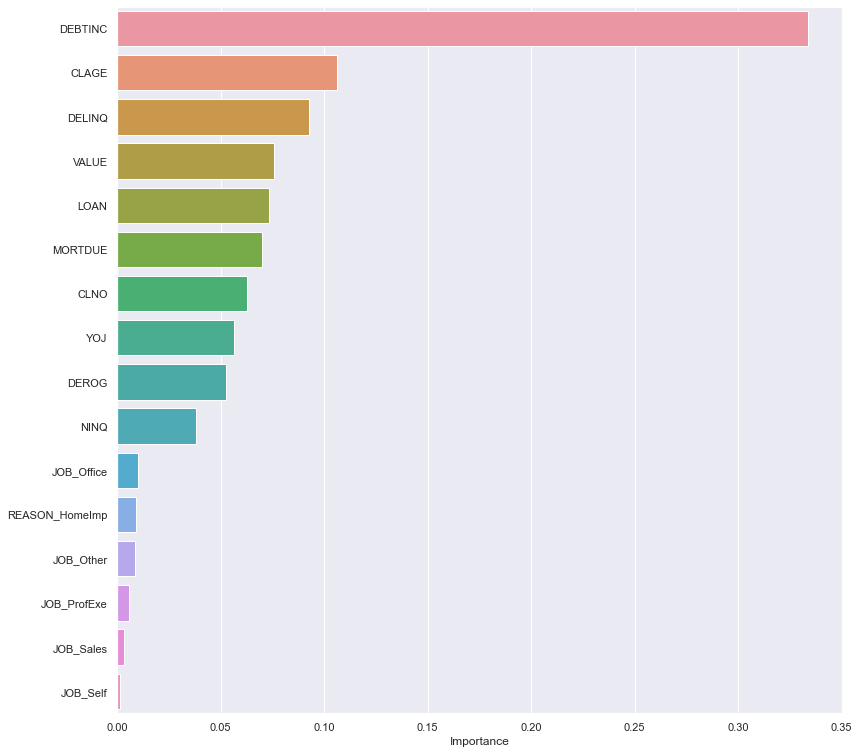

In [90]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_estimator_tuned.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [91]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [92]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [93]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [94]:
# Make the list of all the model names 

models = [log_reg,dt,dtree_estimator,rf_estimator,rf_estimator_weight,rf_estimator_tuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [95]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Class Weight Random Forest', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.808006,0.791946,0.031824,0.010753,0.722222,0.500000
1,Decision Tree,1.000000,0.865772,1.000000,0.618280,1.000000,0.701220
2,Tuned Decision Tree,0.840364,0.815436,0.844553,0.776882,0.561432,0.539179
3,Random Forest,1.000000,0.922260,1.000000,0.690860,1.000000,0.914591
4,Class Weight Random Forest,1.000000,0.914430,1.000000,0.655914,1.000000,0.907063
5,Tuned Random Forest,0.980345,0.916667,0.990208,0.752688,0.916195,0.830861


**Insights**
- The most accurate model for test data is the Random Forest Model but the Tuned Random Forest Model was close enough by 0.006 %
- The most precise model on test data is also the Random Forest Model but the Class Weight Random Forest Model is close by 0.007%
- The best in terms of Recall on test data is the tuned Decision Tree Model but the Tuned Random Forest Model was close enough by 0.024 %
- Overall the Tuned Random Forest Model will give us the best performance in terms of avoiding False Positives and False Negatives.

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

In [96]:
df_comparison = pd.DataFrame({
    'Factor': comparison_frame.columns[1:],
    'Logistic Regression': comparison_frame.loc[comparison_frame['Model']=='Logistic Regression'].iloc[0,1:],
    'Decision Tree': comparison_frame.loc[comparison_frame['Model']=='Decision Tree'].iloc[0,1:], 
    'Tuned Decision Tree': comparison_frame.loc[comparison_frame['Model']=='Tuned Decision Tree'].iloc[0,1:], 
    'Random Forest': comparison_frame.loc[comparison_frame['Model']=='Random Forest'].iloc[0,1:], 
    'Class Weight Random Forest': comparison_frame.loc[comparison_frame['Model']=='Class Weight Random Forest'].iloc[0,1:], 
    'Tuned Random Forest': comparison_frame.loc[comparison_frame['Model']=='Tuned Random Forest'].iloc[0,1:]
})
df_comparison


,Factor,Logistic Regression,Decision Tree,Tuned Decision Tree,Random Forest,Class Weight Random Forest,Tuned Random Forest
Train_Accuracy,Train_Accuracy,0.808006,1.0,0.840364,1.0,1.0,0.980345
Test_Accuracy,Test_Accuracy,0.791946,0.865772,0.815436,0.92226,0.91443,0.916667
Train_Recall,Train_Recall,0.031824,1.0,0.844553,1.0,1.0,0.990208
Test_Recall,Test_Recall,0.010753,0.61828,0.776882,0.69086,0.655914,0.752688
Train_Precision,Train_Precision,0.722222,1.0,0.561432,1.0,1.0,0.916195
Test_Precision,Test_Precision,0.5,0.70122,0.539179,0.914591,0.907063,0.830861


In [97]:
#comparison_frame.loc[comparison_frame['Model']=='Logistic Regression'].iloc[0,1:]
df_melted = comparison_frame.reset_index().melt(id_vars='Model')
df_melted_plot = df_melted.loc[df_melted['variable'] != 'index']
df_melted_plot

,Model,variable,value
6,Logistic Regression,Train_Accuracy,0.808006
7,Decision Tree,Train_Accuracy,1.000000
8,Tuned Decision Tree,Train_Accuracy,0.840364
9,Random Forest,Train_Accuracy,1.000000
10,Class Weight Random Forest,Train_Accuracy,1.000000
11,Tuned Random Forest,Train_Accuracy,0.980345
12,Logistic Regression,Test_Accuracy,0.791946
13,Decision Tree,Test_Accuracy,0.865772
14,Tuned Decision Tree,Test_Accuracy,0.815436
15,Random Forest,Test_Accuracy,0.922260


<AxesSubplot:xlabel='Model', ylabel='value'>

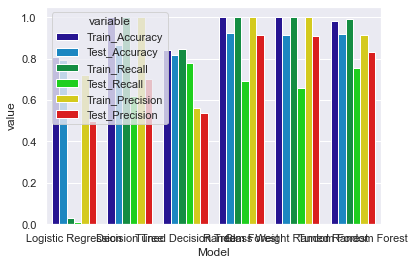

In [98]:
sns.barplot(data=df_melted_plot, x='Model', y='value', hue='variable')

In [99]:
df_melted2 = df_comparison.reset_index().melt(id_vars='Factor')
df_melted_plot2 = df_melted2.loc[df_melted['variable'] != 'index']

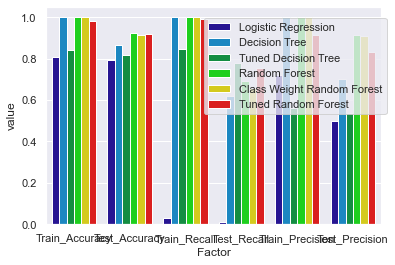

In [100]:
sns.barplot(data=df_melted_plot2, x='Factor', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=1)

In [111]:
data[data.BAD==1].MORTDUE.mean()

69064.49501261565

In [112]:
data[data.BAD==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 5934
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      1189 non-null   category
 1   LOAN     1189 non-null   int64   
 2   MORTDUE  1189 non-null   float64 
 3   VALUE    1189 non-null   float64 
 4   REASON   1189 non-null   category
 5   JOB      1189 non-null   category
 6   YOJ      1189 non-null   float64 
 7   DEROG    1189 non-null   float64 
 8   DELINQ   1189 non-null   float64 
 9   CLAGE    1189 non-null   float64 
 10  NINQ     1189 non-null   float64 
 11  CLNO     1189 non-null   float64 
 12  DEBTINC  1189 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 106.1 KB


In [115]:
1189*0.8*69064

65693676.800000004